# <center >Data Science with Python 
## <center >Statistical and Data Techniques in Data Science 
##  <center> Homework 4

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Question 1: Data information
* Download data from the link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
(or `customers.csv` in the folder attached ).
* Import the data as the name 'data' and check the data head, shape, types, columms. (*Hint:*   `.head()`, `.shape`, `.dtypes`, `.columns.tolist()`.).
* Convert columns excluding 'Channel' and 'Region' to floats if necessary (*Hint:*  `.astype(np.float)`.)
* Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used 

In [1]:
import pandas as pd
import numpy as np
# Write your code from here, add more cells if needed


In [2]:
data = pd.read_csv('customers.csv')

In [4]:
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185

In [6]:
data.shape

(440, 8)

In [9]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

In [10]:
data.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [20]:
data.iloc[:, 2:].astype(np.float)

Fresh     Milk  Grocery   Frozen  Detergents_Paper  Delicatessen
0    12669.0   9656.0   7561.0    214.0            2674.0        1338.0
1     7057.0   9810.0   9568.0   1762.0            3293.0        1776.0
2     6353.0   8808.0   7684.0   2405.0            3516.0        7844.0
3    13265.0   1196.0   4221.0   6404.0             507.0        1788.0
4    22615.0   5410.0   7198.0   3915.0            1777.0        5185.0
5     9413.0   8259.0   5126.0    666.0            1795.0        1451.0
6    12126.0   3199.0   6975.0    480.0            3140.0         545.0
7     7579.0   4956.0   9426.0   1669.0            3321.0        2566.0
8     5963.0   3648.0   6192.0    425.0            1716.0         750.0
9     6006.0  11093.0  18881.0   1159.0            7425.0        2098.0
10    3366.0   5403.0  12974.0   4400.0            5977.0        1744.0
11   13146.0   1124.0   4523.0   1420.0             549.0         497.0
12   31714.0  12319.0  11757.0    287.0            3881.0        2931.0
13   21217.0   6208.0  14982.0   3095.0            6707.0         602.0
14   24653.0   9465.0  12091.0    294.0            5058.0        2168.0
15   10253.0   1114.0   3821.0    397.0             964.0         412.0
16    1020.0   8816.0  12121.0    134.0            4508.0        1080.0
17    5876.0   6157.0   2933.0    839.0             370.0        4478.0
18   18601.0   6327.0  10099.0   2205.0            2767.0        3181.0
19    7780.0   2495.0   9464.0    669.0            2518.0         501.0
20   17546.0   4519.0   4602.0   1066.0            2259.0        2124.0
21    5567.0    871.0   2010.0   3383.0             375.0         569.0
22   31276.0   1917.0   4469.0   9408.0            2381.0        4334.0
23   26373.0  36423.0  22019.0   5154.0            4337.0       16523.0
24   22647.0   9776.0  13792.0   2915.0            4482.0        5778.0
25   16165.0   4230.0   7595.0    201.0            4003.0          57.0
26    9898.0    961.0   2861.0   3151.0             242.0         833.0
27   14276.0    803.0   3045.0    485.0             100.0         518.0
28    4113.0  20484.0  25957.0   1158.0            8604.0        5206.0
29   43088.0   2100.0   2609.0   1200.0            1107.0         823.0
..       ...      ...      ...      ...               ...           ...
410   6633.0   2096.0   4563.0   1389.0            1860.0        1892.0
411   2126.0   3289.0   3281.0   1535.0             235.0        4365.0
412     97.0   3605.0  12400.0     98.0            2970.0          62.0
413   4983.0   4859.0   6633.0  17866.0             912.0        2435.0
414   5969.0   1990.0   3417.0   5679.0            1135.0         290.0
415   7842.0   6046.0   8552.0   1691.0            3540.0        1874.0
416   4389.0  10940.0  10908.0    848.0            6728.0         993.0
417   5065.0   5499.0  11055.0    364.0            3485.0        1063.0
418    660.0   8494.0  18622.0    133.0            6740.0         776.0
419   8861.0   3783.0   2223.0    633.0            1580.0        1521.0
420   4456.0   5266.0  13227.0     25.0            6818.0        1393.0
421  17063.0   4847.0   9053.0   1031.0            3415.0        1784.0
422  26400.0   1377.0   4172.0    830.0             948.0        1218.0
423  17565.0   3686.0   4657.0   1059.0            1803.0         668.0
424  16980.0   2884.0  12232.0    874.0            3213.0         249.0
425  11243.0   2408.0   2593.0  15348.0             108.0        1886.0
426  13134.0   9347.0  14316.0   3141.0            5079.0        1894.0
427  31012.0  16687.0   5429.0  15082.0             439.0        1163.0
428   3047.0   5970.0   4910.0   2198.0             850.0         317.0
429   8607.0   1750.0   3580.0     47.0              84.0        2501.0
430   3097.0   4230.0  16483.0    575.0             241.0        2080.0
431   8533.0   5506.0   5160.0  13486.0            1377.0        1498.0
432  21117.0   1162.0   4754.0    269.0            1328.0         395.0
433   1982.0   3218.0   1493.0   1541.0        

In [21]:
data = data.iloc[:,2:5]

In [22]:
data.head()

Fresh  Milk  Grocery
0  12669  9656     7561
1   7057  9810     9568
2   6353  8808     7684
3  13265  1196     4221
4  22615  5410     7198

### Quesiton 2: Statistical Description
In this question, we only work on the feature 'Grocery'.
 * Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
 * Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
 * Make a boxplot of the annual spending on grocery products.
 * Make a histogram of the annual spending on grocery products.

In [34]:
import statistics as sta

In [35]:
# Min, Max, Mean, Q1, Q3:
data['Grocery'].describe()

count      440.000000
mean      7951.277273
std       9503.162829
min          3.000000
25%       2153.000000
50%       4755.500000
75%      10655.750000
max      92780.000000
Name: Grocery, dtype: float64

In [36]:
# Median:
data['Grocery'].median()

4755.5

In [37]:
# Range
data['Grocery'].max() - data['Grocery'].min()

92777

In [42]:
# Population standard deviation
print ('Population SD: ', sta.pstdev(data['Grocery']))
# Sampe standard devitaion:
print('Sample SD: ', sta.stdev(data['Grocery']))

Population SD:  9492.357637519479
Sample SD:  9503.162828994344


In [46]:
import scipy.stats as ss

In [48]:
# Skewness: 
ss.skew(data['Grocery'])

3.5751872200807875

Skewness is positive so the data is right skewed, or has a long tail to the right.

In [50]:
# Kurtosis: 
ss.kurtosis(data['Grocery'])

20.664153228293365

We know that Kurtosis of Standard normal distribution is 3. So the Kurtosis of 20.6 which is positive and large tells us that the data has longer tails compared to Normal Distribution. In other word, it has more outliers.

In [53]:
import matplotlib.pyplot as plt

Text(0.5,1,'Boxplot of Anual spending on grocery products')

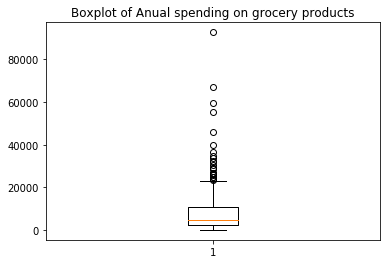

In [67]:
plt.boxplot(data['Grocery'])
plt.title('Boxplot of Anual spending on grocery products')


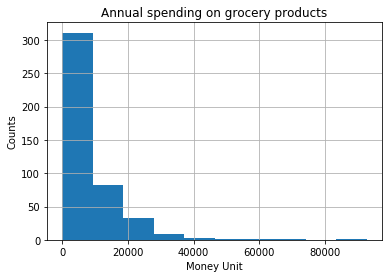

In [63]:
plt.hist(data['Grocery'])
plt.xlabel('Money Unit')
plt.ylabel('Counts')
plt.title('Annual spending on grocery products')
plt.grid(True)


### *Conclusion*:
*From the statistical description and the plot, we notice that Grocery data has asymmetrical shape with outlier. It has longer tail to the right meanings more data with lower values.*

### Question 3: Correlation
* Calculate the correlation of 'Grocery' and 'Milk'.
* Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
* Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
* Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )

In [71]:
# Calculate the correlation of 'Grocery' and 'Milk'.
np.corrcoef(data['Grocery'], data['Milk'])

array([[1.        , 0.72833512],
       [0.72833512, 1.        ]])

Text(0.5,1,'Scatter plot of Grocery and Milk')

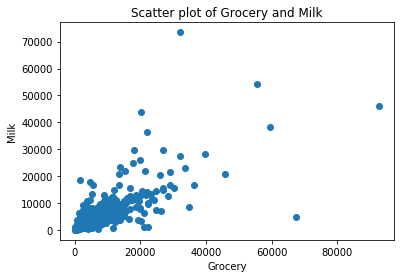

In [74]:
plt.scatter(data['Grocery'], data['Milk'])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.title('Scatter plot of Grocery and Milk')

C:\Users\nhung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000058D8585358>,
      dtype=object)

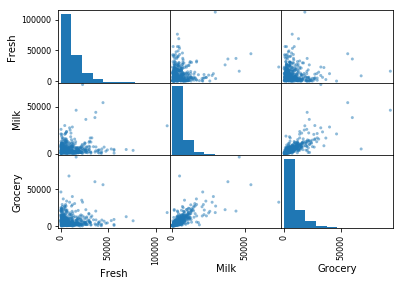

In [76]:
pd.scatter_matrix(data)

In [82]:
import seaborn as sns

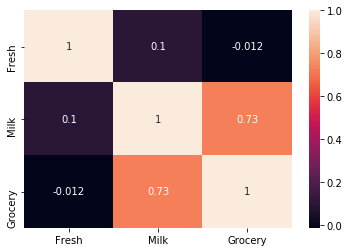

In [85]:
sns.heatmap(data.corr(), annot = True)

### Conclusion:
*Milk and Grocery have high positive correlation whereas Fresh has little correlation with Milk and Grocery.*

### Question 4: Hypothesis testing (part 1)
* Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

In [ ]:
# Write your answer from here, add more cells if needed

### Question 5: Data Preprocessing
* Transform the data by using `np.log` and set the new data as the name 'log_data', then visualize this data by using `pd.scatter_matrix`.
* Remove outliers of each features of 'log_data' whose are out of the fencies "$Q1-IQR*1.5$" and "$Q3+IQR*1.5$", set the new data by the name 'good_log_data' then visualize this data.  

In [ ]:
# Write your answer from here, add more cells if needed

### Question 6: Hypothesis testing (part 2) 

 By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
* The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The means of 'Fresh' in the log_data and good_log_data are different
* The means of 'Milk' in the log_data and good_log_data are different


In [ ]:
# Write your answer from here, add more cells if needed